# Import Libraries

In [284]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split 


## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

The **CO2 EMISSIONS (g/km)** column is the dependent column, and the rest are the independent columns.

In [285]:
df = pd.read_csv("FuelConsumptionCo2.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [286]:
print(f'The shape of the data frame : {df.shape}')

The shape of the data frame : (1067, 13)


In [287]:
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [288]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [289]:
df.duplicated().sum()

0

In [290]:
df = df[
    ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
     'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']
]

df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


# Exercise 1 : Histogram

Plot a Histogram for the following columns :-

1. CO2EMISSIONS
2. CYLINDERS
3. ENGINESIZE
4. FUELCONSUMPTION_COMB
5. FUELCONSUMPTION_CITY
6. FUELCONSUMPTION_HWY
7. FUELCONSUMPTION_COMB_MPG

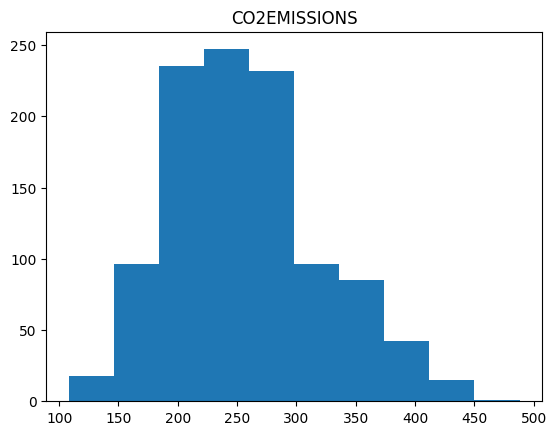

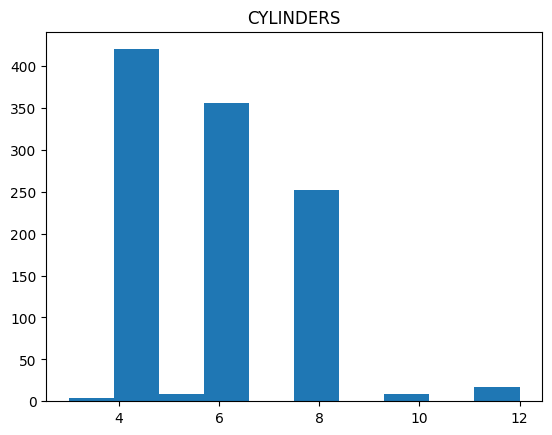

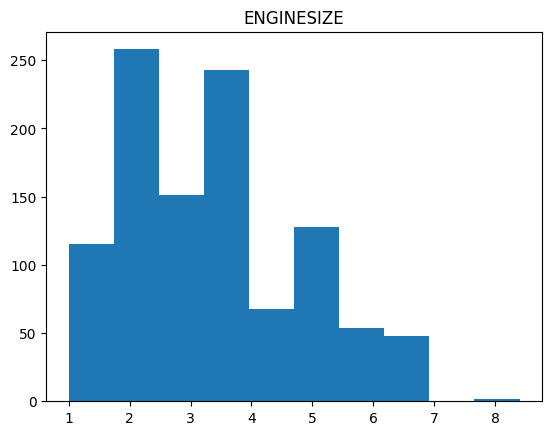

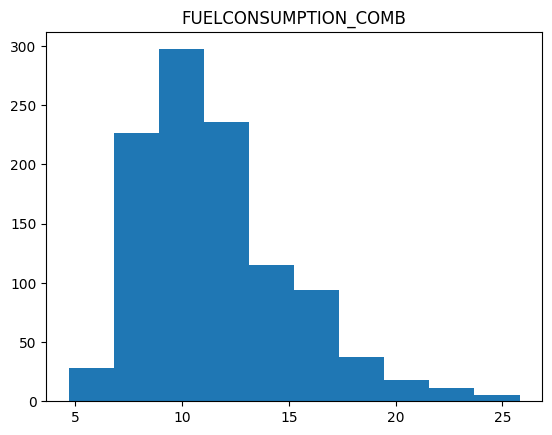

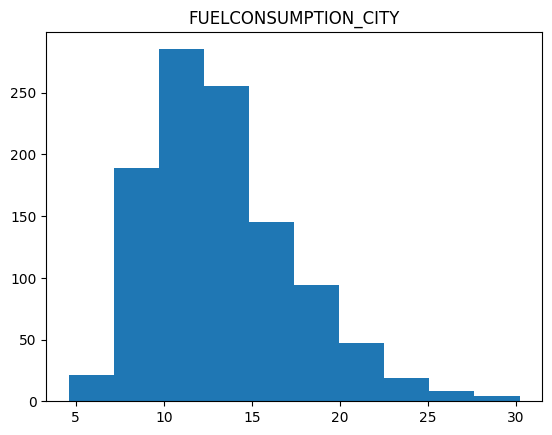

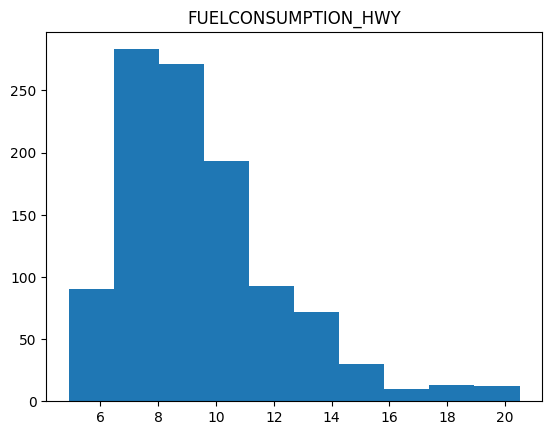

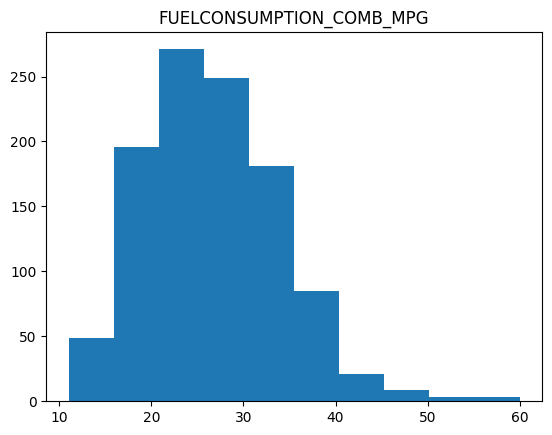

In [291]:
plt.hist(df['CO2EMISSIONS'])
plt.title("CO2EMISSIONS")
plt.show()

plt.hist(df['CYLINDERS'])
plt.title("CYLINDERS")
plt.show()

plt.hist(df['ENGINESIZE'])
plt.title("ENGINESIZE")
plt.show()

plt.hist(df['FUELCONSUMPTION_COMB'])
plt.title("FUELCONSUMPTION_COMB")
plt.show()

plt.hist(df['FUELCONSUMPTION_CITY'])
plt.title("FUELCONSUMPTION_CITY")
plt.show()

plt.hist(df['FUELCONSUMPTION_HWY'])
plt.title("FUELCONSUMPTION_HWY")
plt.show()

plt.hist(df['FUELCONSUMPTION_COMB_MPG'])
plt.title("FUELCONSUMPTION_COMB_MPG")
plt.show()


# Exercise 2 : Scatter Plots

Plot 7 scatter plots, the 7 X features with CO2EMISSIONS.

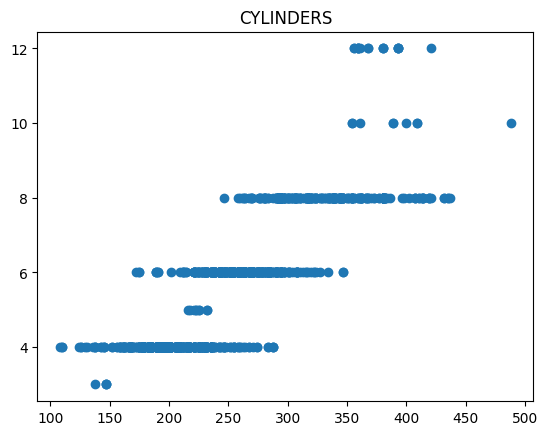

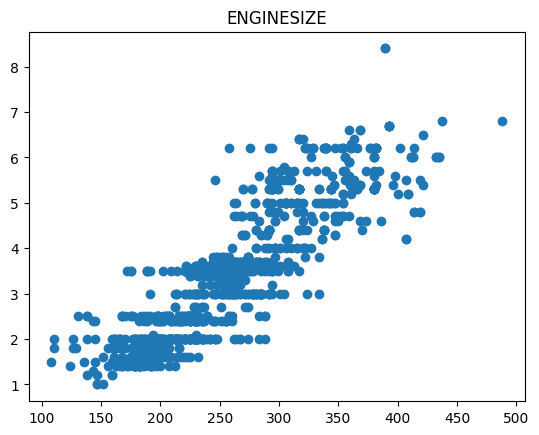

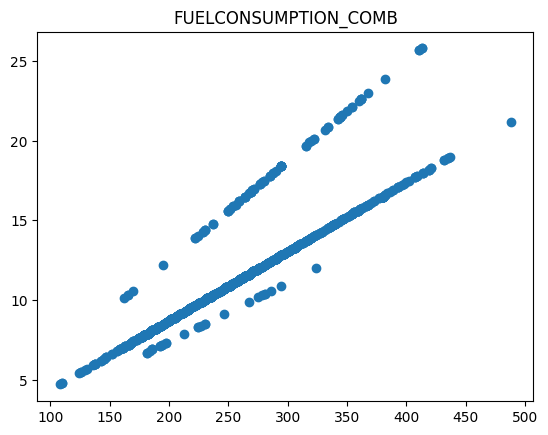

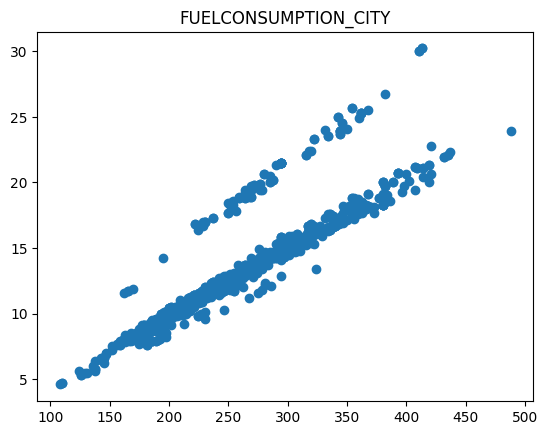

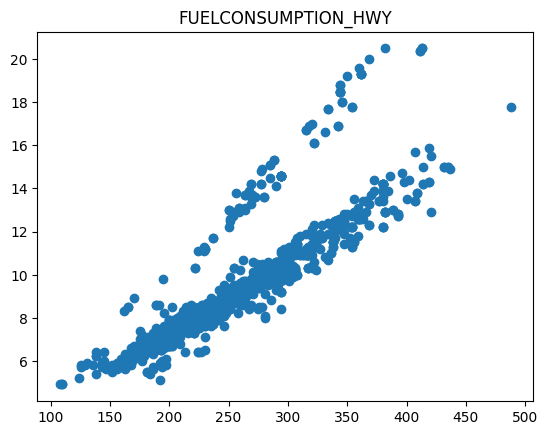

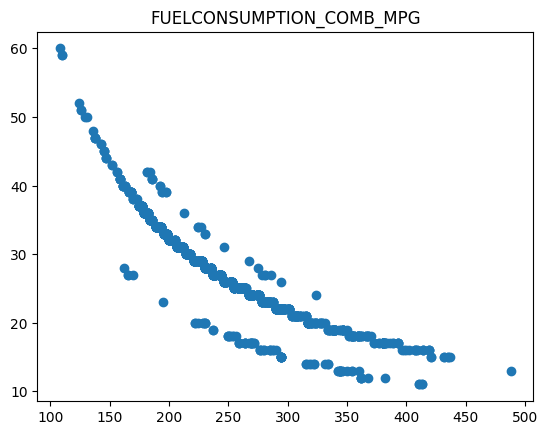

In [292]:
plt.scatter(y=df['CYLINDERS'],x=df['CO2EMISSIONS'])
plt.title("CYLINDERS")
plt.show()

plt.scatter(y=df['ENGINESIZE'],x=df['CO2EMISSIONS'])
plt.title("ENGINESIZE")
plt.show()

plt.scatter(y=df['FUELCONSUMPTION_COMB'],x=df['CO2EMISSIONS'])
plt.title("FUELCONSUMPTION_COMB")
plt.show()

plt.scatter(y=df['FUELCONSUMPTION_CITY'],x=df['CO2EMISSIONS'])
plt.title("FUELCONSUMPTION_CITY")
plt.show()

plt.scatter(y=df['FUELCONSUMPTION_HWY'],x=df['CO2EMISSIONS'])
plt.title("FUELCONSUMPTION_HWY")
plt.show()

plt.scatter(y=df['FUELCONSUMPTION_COMB_MPG'],x=df['CO2EMISSIONS'])
plt.title("FUELCONSUMPTION_COMB_MPG")
plt.show()



# Exercise 3 : Box Plots

Plot 6 box plots for :-
1. CYLINDERS
2. ENGINESIZE
3. FUELCONSUMPTION_COMB
4. FUELCONSUMPTION_CITY
5. FUELCONSUMPTION_HWY
6. FUELCONSUMPTION_COMB_MPG

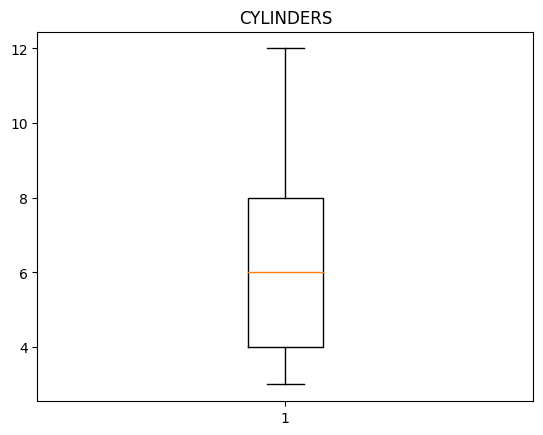

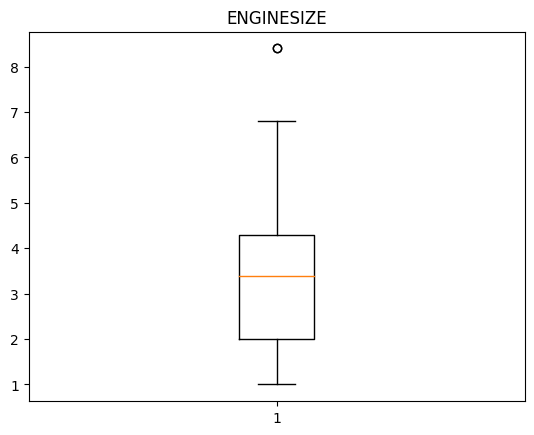

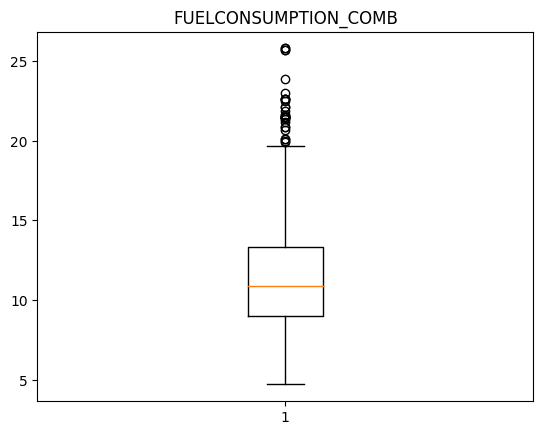

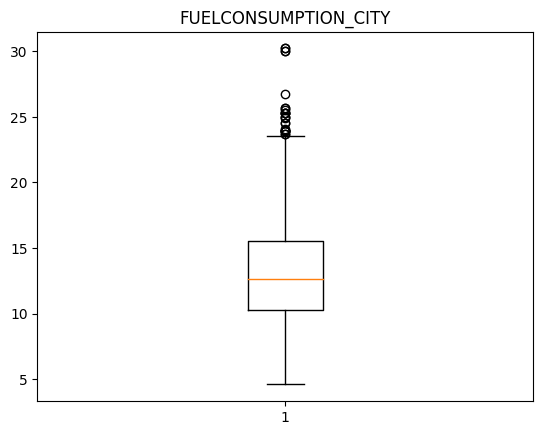

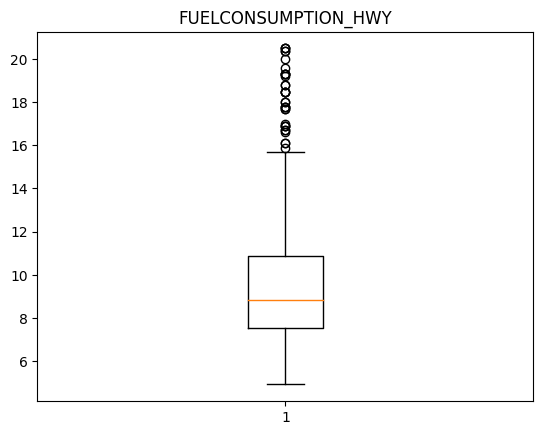

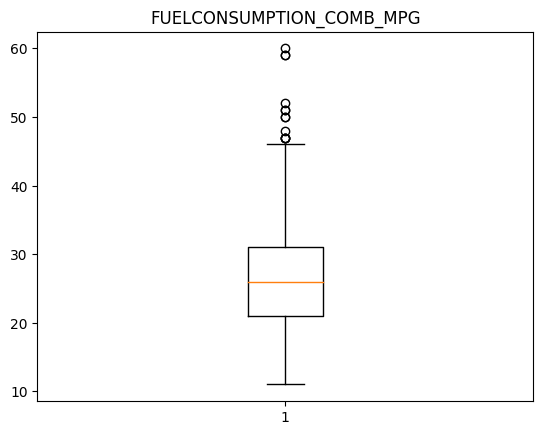

In [293]:
plt.boxplot(df['CYLINDERS'])
plt.title("CYLINDERS")
plt.show()

plt.boxplot(df['ENGINESIZE'])
plt.title("ENGINESIZE")
plt.show()

plt.boxplot(df['FUELCONSUMPTION_COMB'])
plt.title("FUELCONSUMPTION_COMB")
plt.show()

plt.boxplot(df['FUELCONSUMPTION_CITY'])
plt.title("FUELCONSUMPTION_CITY")
plt.show()

plt.boxplot(df['FUELCONSUMPTION_HWY'])
plt.title("FUELCONSUMPTION_HWY")
plt.show()

plt.boxplot(df['FUELCONSUMPTION_COMB_MPG'])
plt.title("FUELCONSUMPTION_COMB_MPG")
plt.show()

# Exercise 4 : Remove Outliers

Then plot a box plot to check if the outliers was removed or not.

Q1 = df['CYLINDERS'].quantile(0.25)
Q3 = df['CYLINDERS'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
high_limit = Q3 + 1.5 * IQR

outliers = df[(df['CYLINDERS'] < Q1 - 1.5 * IQR) | (df['CYLINDERS'] > Q3 + 1.5 * IQR)]
df = df.drop(outliers.index)|

In [294]:
Q1 = df['ENGINESIZE'].quantile(0.25)
Q3 = df['ENGINESIZE'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
high_limit = Q3 + 1.5 * IQR

outliers = df[(df['ENGINESIZE'] < Q1 - 1.5 * IQR) | (df['ENGINESIZE'] > Q3 + 1.5 * IQR)]
df = df.drop(outliers.index)

In [295]:
Q1 = df['FUELCONSUMPTION_COMB'].quantile(0.25)
Q3 = df['FUELCONSUMPTION_COMB'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
high_limit = Q3 + 1.5 * IQR

outliers = df[(df['FUELCONSUMPTION_COMB'] < Q1 - 1.5 * IQR) | (df['FUELCONSUMPTION_COMB'] > Q3 + 1.5 * IQR)]
df = df.drop(outliers.index)

In [296]:
Q1 = df['FUELCONSUMPTION_CITY'].quantile(0.25)
Q3 = df['FUELCONSUMPTION_CITY'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
high_limit = Q3 + 1.5 * IQR

outliers = df[(df['FUELCONSUMPTION_CITY'] < Q1 - 1.5 * IQR) | (df['FUELCONSUMPTION_CITY'] > Q3 + 1.5 * IQR)]
df = df.drop(outliers.index)

In [297]:
Q1 = df['FUELCONSUMPTION_HWY'].quantile(0.25)
Q3 = df['FUELCONSUMPTION_HWY'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
high_limit = Q3 + 1.5 * IQR

outliers = df[(df['FUELCONSUMPTION_HWY'] < Q1 - 1.5 * IQR) | (df['FUELCONSUMPTION_HWY'] > Q3 + 1.5 * IQR)]
df = df.drop(outliers.index)

In [298]:
Q1 = df['FUELCONSUMPTION_COMB_MPG'].quantile(0.25)
Q3 = df['FUELCONSUMPTION_COMB_MPG'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
high_limit = Q3 + 1.5 * IQR

outliers = df[(df['FUELCONSUMPTION_COMB_MPG'] < Q1 - 1.5 * IQR) | (df['FUELCONSUMPTION_COMB_MPG'] > Q3 + 1.5 * IQR)]
df = df.drop(outliers.index)

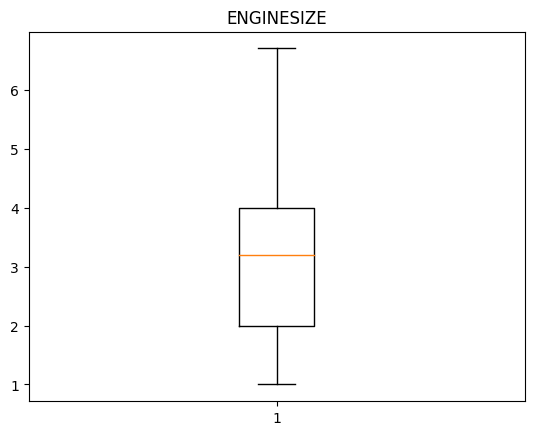

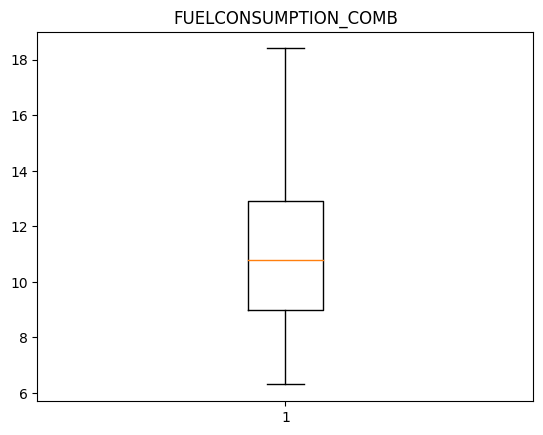

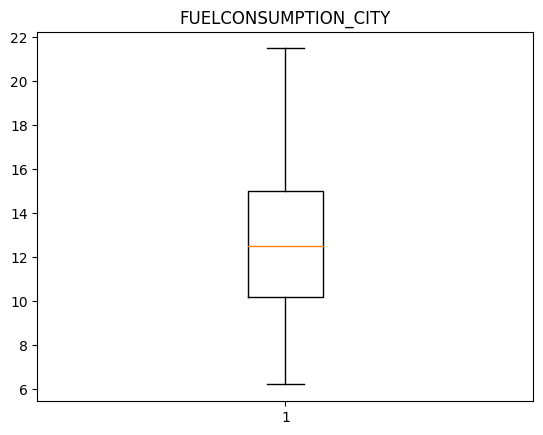

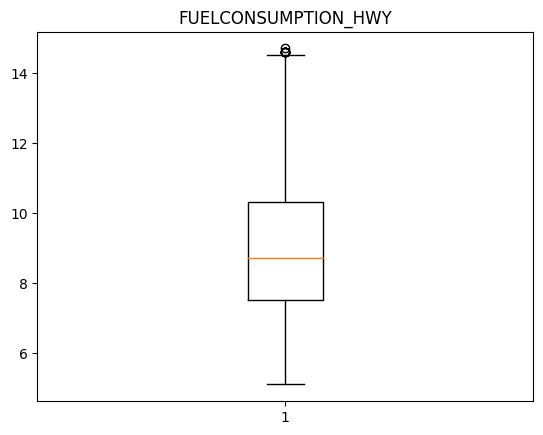

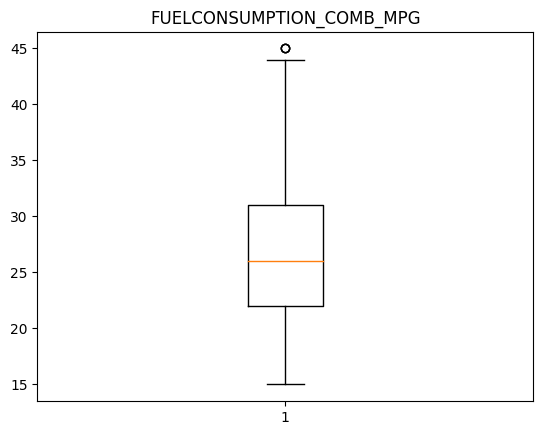

In [299]:
plt.boxplot(df['ENGINESIZE'])
plt.title("ENGINESIZE")
plt.show()

plt.boxplot(df['FUELCONSUMPTION_COMB'])
plt.title("FUELCONSUMPTION_COMB")
plt.show()

plt.boxplot(df['FUELCONSUMPTION_CITY'])
plt.title("FUELCONSUMPTION_CITY")
plt.show()

plt.boxplot(df['FUELCONSUMPTION_HWY'])
plt.title("FUELCONSUMPTION_HWY")
plt.show()

plt.boxplot(df['FUELCONSUMPTION_COMB_MPG'])
plt.title("FUELCONSUMPTION_COMB_MPG")
plt.show()

# Exercise 5 : Train and Test Split

Split the features in X variable and target in the Y variable.

Then use train_test_split method to split the dataset into train and test sets.

The test set have 20% of the dataset and the random state is 42.

In [300]:
X= df[['FUELCONSUMPTION_COMB_MPG','FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','ENGINESIZE','CYLINDERS']] 
y=df['CO2EMISSIONS']

X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=42,  
                                   test_size=0.2) 

print('X_train : ') 
print(X_train.head(),X_train.shape) 
print('') 
print('X_test : ') 
print(X_test.head(),X_test.shape) 
print('') 
print('y_train : ') 
print(y_train.head(),y_train.shape) 
print('') 
print('y_test : ') 
print(y_test.head(),y_test.shape)

X_train : 
     FUELCONSUMPTION_COMB_MPG  FUELCONSUMPTION_HWY  FUELCONSUMPTION_CITY  \
30                         25                  8.8                  13.1   
581                        28                  8.7                  11.4   
750                        22                 10.3                  15.0   
603                        34                  6.6                   9.8   
894                        22                 10.6                  15.0   

     FUELCONSUMPTION_COMB  ENGINESIZE  CYLINDERS  
30                   11.2         3.0          6  
581                  10.2         2.4          4  
750                  12.9         5.5          8  
603                   8.4         2.0          4  
894                  13.0         4.8          8   (800, 6)

X_test : 
     FUELCONSUMPTION_COMB_MPG  FUELCONSUMPTION_HWY  FUELCONSUMPTION_CITY  \
567                        21                 10.9                  15.9   
794                        34                  7.0    

# Exercise 4 : Simple Linear Regression.

Train a simple linear regression

X = Engine Size.
Y = Emission.

What is the coefficients and y intercept?

In [301]:
# Create the linear regression model
linear_regression_model = LinearRegression()
# Train the model using fit method
linear_regression_model.fit((X_train['ENGINESIZE'].to_numpy()).reshape(-1,1), y_train)

# Print the wight (coefficient, slope) and y bias (y intercept).
wight = linear_regression_model.coef_
bias = linear_regression_model.intercept_
print(wight, bias)

[36.23534955] 133.94831955222963


# Exercise 5 : Plot the Output

Plot linear regression model (output).

In [302]:
def calculate_cost(y_act, y_hat):
    cost = 0
    for i in range(len(y_act)):
        cost += (y_act[i] - y_hat[i]) ** 2
    total_cost = cost / len(y_act)
    return cost

def find_y(x, beta, b):
    y = []
    for xi in x:
        y.append(xi * beta + b)
    return np.array(y)

In [303]:
y_pred = find_y(X_test['ENGINESIZE'].to_numpy(), wight[0], bias)
y_pred

array([315.12506728, 191.92487883, 191.92487883, 224.53669342,
       307.87799737, 333.24274206, 206.41901864, 315.12506728,
       264.39557792, 242.65436819, 257.14850801, 206.41901864,
       304.25446242, 206.41901864, 300.63092746, 264.39557792,
       264.39557792, 206.41901864, 220.91315846, 184.67780892,
       220.91315846, 358.60748674, 206.41901864, 220.91315846,
       325.99567215, 199.17194874, 293.38385756, 206.41901864,
       206.41901864, 188.30134387, 260.77204296, 264.39557792,
       260.77204296, 315.12506728, 206.41901864, 184.67780892,
       260.77204296, 220.91315846, 206.41901864, 278.88971774,
       329.6192071 , 206.41901864, 264.39557792, 206.41901864,
       206.41901864, 264.39557792, 224.53669342, 315.12506728,
       220.91315846, 242.65436819, 191.92487883, 170.1836691 ,
       220.91315846, 253.52497305, 206.41901864, 278.88971774,
       300.63092746, 260.77204296, 220.91315846, 271.64264783,
       264.39557792, 242.65436819, 365.85455665, 325.99

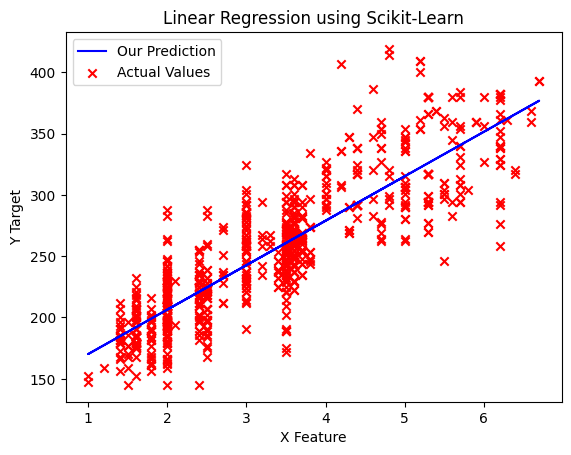

In [304]:

plt.plot((X_test['ENGINESIZE'].to_numpy()), y_pred, c='b',label='Our Prediction')
plt.scatter((X_train['ENGINESIZE'].to_numpy()), y_train, marker='x', c='r',label='Actual Values')

plt.title("Linear Regression using Scikit-Learn")

plt.ylabel('Y Target')
plt.xlabel('X Feature')
plt.legend()

plt.show()

# Exercise 6 : Evaluation

Evaluate the model using MSE, RMSE, MAE, and R^2.

In [305]:
import math


print(f'MSE  : {mean_squared_error(y_test, y_pred)}')
print(f'RMSE : {math.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE  : {mean_absolute_error(y_test, y_pred)}')
print(f'R^2  : {r2_score(y_test, y_pred)}')

MSE  : 987.6380467812269
RMSE : 31.426709130630062
MAE  : 23.255455351472975
R^2  : 0.7608594923114447


# Exercise 7 : Repeat 4, 5, and 6

Repeat the steps 4, 5, and 6.

For the rest features (CYLINDERS, FUELCONSUMPTION_COMB, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY) and then sort the models based on the best performance.

Note : Do not train the FUELCONSUMPTION_COMB_MPG.

[18.53253994] 44.74186918353905
MSE  : 477.5046302004528
RMSE : 21.85187932880037
MAE  : 13.67214850771295
R^2  : 0.8843800114202499


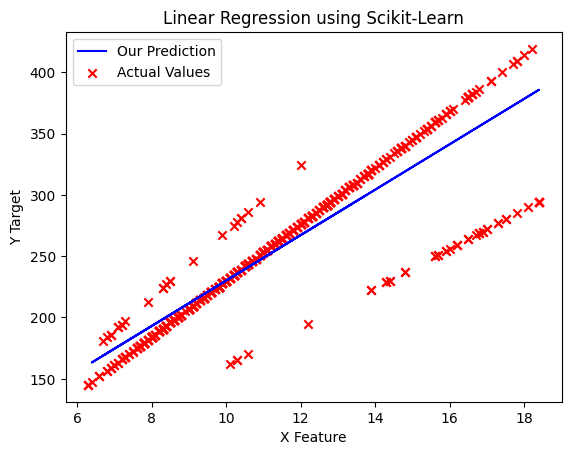

In [306]:

lr = LinearRegression()
lr.fit((X_train['FUELCONSUMPTION_COMB'].to_numpy()).reshape(-1,1), y_train)
wight = lr.coef_
bias = lr.intercept_
print(wight, bias)

y_pred = find_y(X_test['FUELCONSUMPTION_COMB'].to_numpy(), wight[0], bias)

print(f'MSE  : {mean_squared_error(y_test, y_pred)}')
print(f'RMSE : {math.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE  : {mean_absolute_error(y_test, y_pred)}')
print(f'R^2  : {r2_score(y_test, y_pred)}')




# plot
plt.plot((X_test['FUELCONSUMPTION_COMB'].to_numpy()), y_pred, c='b',label='Our Prediction')
plt.scatter((X_train['FUELCONSUMPTION_COMB'].to_numpy()), y_train, marker='x', c='r',label='Actual Values')

plt.title("Linear Regression using Scikit-Learn")

plt.ylabel('Y Target')
plt.xlabel('X Feature')
plt.legend()

plt.show()

[15.40112885] 53.917512698231405
MSE  : 510.54239290527505
RMSE : 22.59518517085609
MAE  : 14.209998855815552
R^2  : 0.8763804539185174


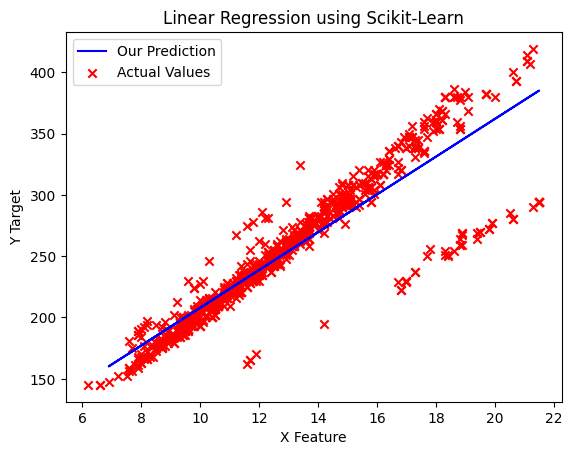

In [307]:
lr = LinearRegression()
lr.fit((X_train['FUELCONSUMPTION_CITY'].to_numpy()).reshape(-1,1), y_train)
wight = lr.coef_
bias = lr.intercept_
print(wight, bias)

y_pred = find_y(X_test['FUELCONSUMPTION_CITY'].to_numpy(), wight[0], bias)

print(f'MSE  : {mean_squared_error(y_test, y_pred)}')
print(f'RMSE : {math.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE  : {mean_absolute_error(y_test, y_pred)}')
print(f'R^2  : {r2_score(y_test, y_pred)}')

plt.plot((X_test['FUELCONSUMPTION_CITY'].to_numpy()), y_pred, c='b',label='Our Prediction')
plt.scatter((X_train['FUELCONSUMPTION_CITY'].to_numpy()), y_train, marker='x', c='r',label='Actual Values')

plt.title("Linear Regression using Scikit-Learn")

plt.ylabel('Y Target')
plt.xlabel('X Feature')
plt.legend()

plt.show()

[23.2251742] 40.113427033536766
MSE  : 607.5931194971229
RMSE : 24.649404039390543
MAE  : 17.01089384033271
R^2  : 0.8528811971772887


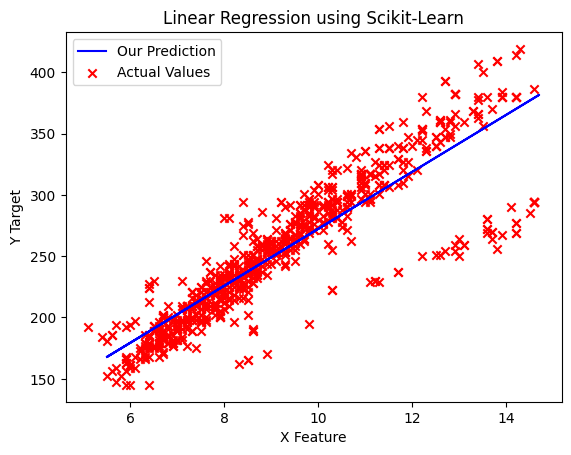

In [308]:
lr = LinearRegression()
lr.fit((X_train['FUELCONSUMPTION_HWY'].to_numpy()).reshape(-1,1), y_train)
wight = lr.coef_
bias = lr.intercept_
print(wight, bias)

y_pred = find_y(X_test['FUELCONSUMPTION_HWY'].to_numpy(), wight[0], bias)

print(f'MSE  : {mean_squared_error(y_test, y_pred)}')
print(f'RMSE : {math.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE  : {mean_absolute_error(y_test, y_pred)}')
print(f'R^2  : {r2_score(y_test, y_pred)}')

plt.plot((X_test['FUELCONSUMPTION_HWY'].to_numpy()), y_pred, c='b',label='Our Prediction')
plt.scatter((X_train['FUELCONSUMPTION_HWY'].to_numpy()), y_train, marker='x', c='r',label='Actual Values')

plt.title("Linear Regression using Scikit-Learn")

plt.ylabel('Y Target')
plt.xlabel('X Feature')
plt.legend()

plt.show()

[27.63015278] 94.48970454675947
MSE  : 1180.2282390936696
RMSE : 34.35445006245435
MAE  : 26.82997484893408
R^2  : 0.7142269060967543


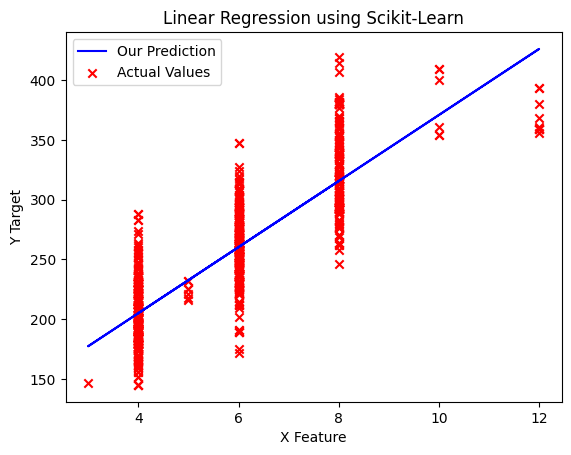

In [309]:
lr = LinearRegression()
lr.fit((X_train['CYLINDERS'].to_numpy()).reshape(-1,1), y_train)
wight = lr.coef_
bias = lr.intercept_
print(wight, bias)

y_pred = find_y(X_test['CYLINDERS'].to_numpy(), wight[0], bias)

print(f'MSE  : {mean_squared_error(y_test, y_pred)}')
print(f'RMSE : {math.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE  : {mean_absolute_error(y_test, y_pred)}')
print(f'R^2  : {r2_score(y_test, y_pred)}')



plt.plot((X_test['CYLINDERS'].to_numpy()), y_pred, c='b',label='Our Prediction')
plt.scatter((X_train['CYLINDERS'].to_numpy()), y_train, marker='x', c='r',label='Actual Values')

plt.title("Linear Regression using Scikit-Learn")

plt.ylabel('Y Target')
plt.xlabel('X Feature')
plt.legend()

plt.show()

# Exercise 8 : Multiple Linear Regression

Train one linear regression model with the following features :-

1. CYLINDERS
2. ENGINESIZE
3. FUELCONSUMPTION_COMB
4. FUELCONSUMPTION_CITY
5. FUELCONSUMPTION_HWY

Plot the output for each feature with the Y label.

In [310]:
#'FUELCONSUMPTION_COMB_MPG','FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','ENGINESIZE','CYLINDERS'

lr = LinearRegression()
lr.fit(X_train[['FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','ENGINESIZE','CYLINDERS']], y_train)
wight = lr.coef_
bias = lr.intercept_
print(wight, bias)

y_pred = lr.predict(X_test[['FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','ENGINESIZE','CYLINDERS']])


print(f'MSE  : {mean_squared_error(y_test, y_pred)}')
print(f'RMSE : {math.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE  : {mean_absolute_error(y_test, y_pred)}')

print(f'R^2  : {r2_score(y_test, y_pred)}')

[ -5.50197161 -13.6848387   32.25281721   7.04499388   7.7468524 ] 50.39876849810091
MSE  : 398.87868661713696
RMSE : 19.971947491848084
MAE  : 13.563836069646447
R^2  : 0.9034180062881925


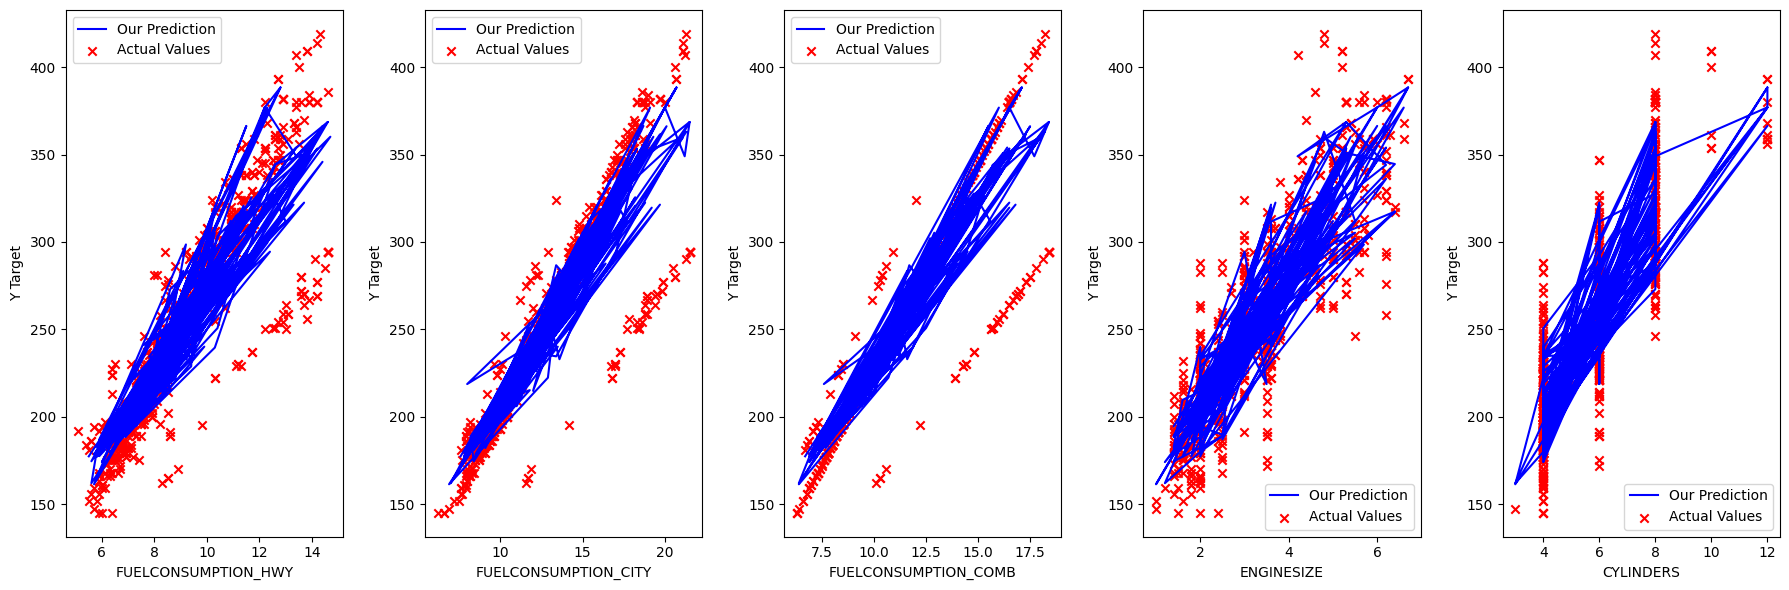

In [311]:
# Plotting each feature against the target variable
fig, axs = plt.subplots(1, len(X_train[['FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','ENGINESIZE','CYLINDERS']].columns), figsize=(18, 6))

for i, col in enumerate(X_train[['FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','ENGINESIZE','CYLINDERS']].columns):
    axs[i].plot(X_test[col], y_pred, c='b', label='Our Prediction')
    axs[i].scatter(X_train[col], y_train, marker='x', c='r', label='Actual Values')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Y Target')
    axs[i].legend()

plt.tight_layout()
plt.show()